1. Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis based on a given set of training data samples. Read the training data from a .CSV file.

In [ ]:
import csv
a = []
with open('ENJOYSPORT.csv', 'r') as csvfile:
    next(csvfile)
    for row in csv.reader(csvfile):
        a.append(row)
    print(a)
print("\nThe total number of training instances are : ",len(a))
num_attribute = len(a[0])-1
print("\nThe initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)
for i in range(0, len(a)):
    if a[i][num_attribute] == 'yes':
        print ("\nInstance ", i+1, "is", a[i], " and is Positive Instance")
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")
    if a[i][num_attribute] == 'no':
        print ("\nInstance ", i+1, "is", a[i], " and is Negative Instance Hence Ignored")
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")
print("\nThe Maximally specific hypothesis for the training instance is ", hypothesis)

[['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'yes'], ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'yes'], ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'no'], ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'yes']]

The total number of training instances are :  4

The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

Instance  1 is ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'yes']  and is Positive Instance
The hypothesis for the training instance 1  is:  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same'] 


Instance  2 is ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'yes']  and is Positive Instance
The hypothesis for the training instance 2  is:  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same'] 


Instance  3 is ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'no']  and is Negative Instance Hence Ignored
The hypothesis for the training instance 3  is:  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same'] 


Instance  4 is ['S

2. For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate Elimination algorithm to output a description of the set of all hypothesis consistent with the training examples.

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("ENJOYSPORT.csv")
concepts = np.array(data.iloc[:, 0:-1])
print("\nInstances are:\n", concepts)
target = np.array(data.iloc[:, -1])
print("\nTarget Values are: ", target)
def learn(concepts, target):
    positive_instances = [concepts[i] for i in range(len(concepts)) if target[i] == 'yes']
    specific_h = positive_instances[0].copy()
    print("\nInitialization of specific_h and generic_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [['?' for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    print("\nGeneric Boundary: ", general_h)
    for i, h in enumerate(concepts):
        print("\nInstance", i + 1, "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
        print("Specific Boundary after ", i + 1, "Instance is ", specific_h)
        print("Generic Boundary after ", i + 1, "Instance is ", general_h)
        print("\n")
    indices = [i for i, val in enumerate(general_h) if val == ['?' for _ in range(len(specific_h))]]
    for i in indices:
        general_h.remove(['?' for _ in range(len(specific_h))])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")


Instances are:
 [['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]

Target Values are:  ['yes' 'yes' 'no' 'yes']

Initialization of specific_h and generic_h

Specific Boundary:  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Instance is Positive 
Specific Boundary after  1 Instance is  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]





3. Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("/content/archive (2).zip")
data["diagnosis"].value_counts()
from sklearn import preprocessing
label_encode =preprocessing.LabelEncoder()
labels = label_encode.fit_transform(data["diagnosis"])
data["target"] =labels
data.drop(columns="diagnosis", axis=1, inplace=True)
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[85  5]
 [ 2 51]]


0.951048951048951

4. Write a program to demonstrate the working of Support Vector Machine by using appropriate data set.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
iris = pd.read_csv('Iris.csv')
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9736842105263158


In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


5. Write a program to implement k- Nearest Neighbor algorithm to classify the iris data set. Print both correct and wrong predictions. (Python ML library can be used for this problem)
Page

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
irisData = load_iris()
X = irisData.data
y = irisData.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
knn.score(X_test, y_test)

0.9666666666666667

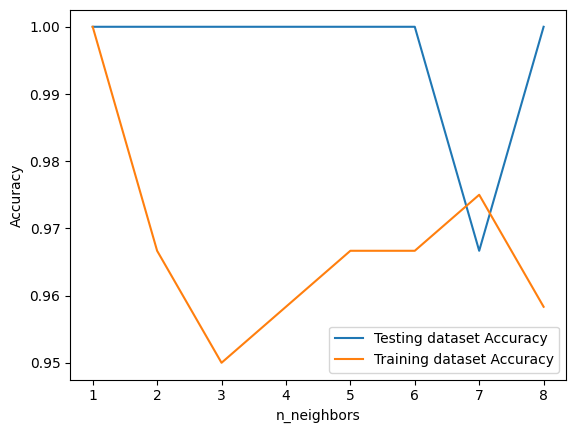

In [ ]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

6. Write a program to demonstrate the working of  EM algorithm.

<ipython-input-1-f8017a9a1605>:28: RuntimeWarning: invalid value encountered in divide
  gamma1 = prob1 / total_prob
<ipython-input-1-f8017a9a1605>:29: RuntimeWarning: invalid value encountered in divide
  gamma2 = prob2 / total_prob


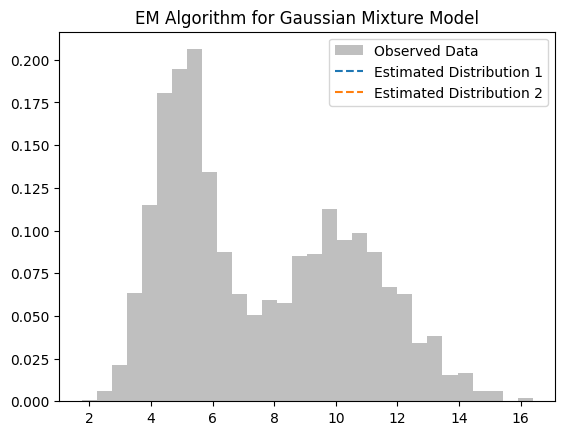

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

mu1, sigma1 = 5, 1
mu2, sigma2 = 10, 2

data1 = np.random.normal(mu1, sigma1, 1000)
data2 = np.random.normal(mu2, sigma2, 1000)
observed_data = np.concatenate([data1, data2])

def initialize_parameters():
    pi = np.random.rand()
    mu1, mu2 = np.random.rand() * 10, np.random.rand() * 10
    sigma1, sigma2 = np.random.rand(), np.random.rand()
    return pi, mu1, sigma1, mu2, sigma2

def gaussian(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

def expectation_step(data, pi, mu1, sigma1, mu2, sigma2):
    prob1 = pi * gaussian(data, mu1, sigma1)
    prob2 = (1 - pi) * gaussian(data, mu2, sigma2)

    total_prob = prob1 + prob2
    gamma1 = prob1 / total_prob
    gamma2 = prob2 / total_prob

    return gamma1, gamma2

def maximization_step(data, gamma1, gamma2):
    N1 = np.sum(gamma1)
    N2 = np.sum(gamma2)

    pi = (N1 + N2) / len(data)
    mu1 = np.sum(gamma1 * data) / N1
    sigma1 = np.sqrt(np.sum(gamma1 * (data - mu1)**2) / N1)

    mu2 = np.sum(gamma2 * data) / N2
    sigma2 = np.sqrt(np.sum(gamma2 * (data - mu2)**2) / N2)

    return pi, mu1, sigma1, mu2, sigma2

def em_algorithm(data, num_iterations):
    pi, mu1, sigma1, mu2, sigma2 = initialize_parameters()

    for _ in range(num_iterations):
        gamma1, gamma2 = expectation_step(data, pi, mu1, sigma1, mu2, sigma2)
        pi, mu1, sigma1, mu2, sigma2 = maximization_step(data, gamma1, gamma2)

    return pi, mu1, sigma1, mu2, sigma2

num_iterations = 50
estimated_pi, estimated_mu1, estimated_sigma1, estimated_mu2, estimated_sigma2 = em_algorithm(observed_data, num_iterations)
x = np.linspace(0, 15, 1000)
plt.hist(observed_data, bins=30, density=True, alpha=0.5, color='gray', label='Observed Data')

plt.plot(x, estimated_pi * gaussian(x, estimated_mu1, estimated_sigma1), '--', label='Estimated Distribution 1')
plt.plot(x, (1 - estimated_pi) * gaussian(x, estimated_mu2, estimated_sigma2), '--', label='Estimated Distribution 2')

plt.title('EM Algorithm for Gaussian Mixture Model')
plt.legend()
plt.show()


7. Write a python program to implement Naive bayesian Classifier using any appropriate dataset.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



8. Write a program to implement K means Clustering, demonstrate the working by considering appropriate dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


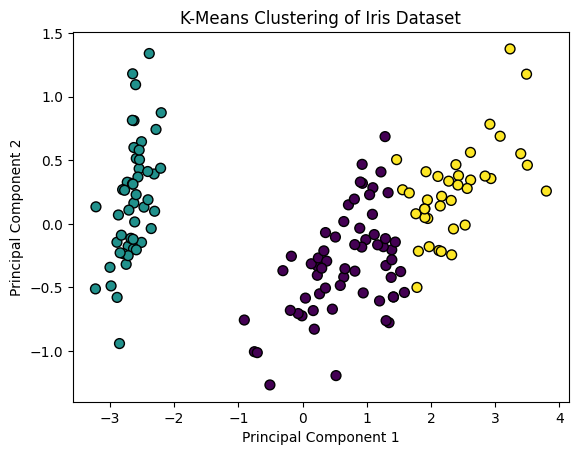

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot to visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


9. Write a program to demonstrate the working of Apriori alogirthm.

In [5]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
transactions = [
    ['bread', 'milk', 'eggs'],
    ['bread', 'butter', 'jelly'],
    ['milk', 'butter', 'bread', 'jelly'],
    ['milk', 'eggs', 'butter'],
    ['bread', 'milk', 'butter', 'jelly']
]
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
    support                      itemsets
0       0.8                       (bread)
1       0.8                      (butter)
2       0.4                        (eggs)
3       0.6                       (jelly)
4       0.8                        (milk)
5       0.6               (butter, bread)
6       0.2                 (eggs, bread)
7       0.6                (jelly, bread)
8       0.6                 (milk, bread)
9       0.2                (butter, eggs)
10      0.6               (butter, jelly)
11      0.6                (milk, butter)
12      0.4                  (milk, eggs)
13      0.4                 (milk, jelly)
14      0.6        (butter, jelly, bread)
15      0.4         (milk, butter, bread)
16      0.2           (milk, eggs, bread)
17      0.4          (milk, jelly, bread)
18      0.2          (milk, butter, eggs)
19      0.4         (milk, butter, jelly)
20      0.4  (milk, butter, jelly, bread)

Association Rules:
              antecedents      conseq

10. Write a program to implement PCA by using appropriate datasets for the computation.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


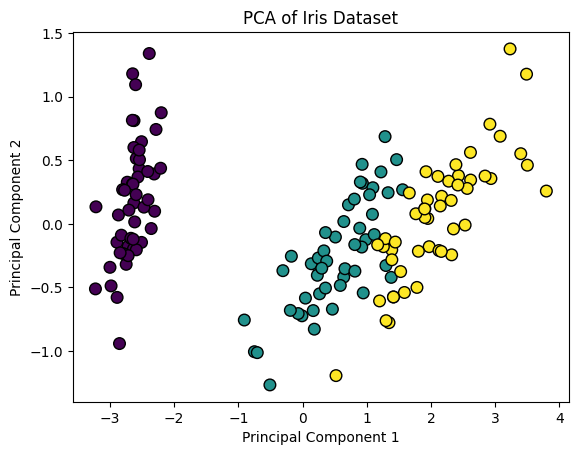

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data
y = iris.target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=70)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()